In [1]:
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np
from datetime import datetime


df = pd.read_csv('data/data01.csv', index_col=0, parse_dates=True,encoding = "ISO-8859-1")

rows, columns = df.shape
print('rows : {}, columns : {}'.format(rows, columns))



rows : 5000, columns : 9


In [2]:
df.columns

Index(['employee_id', 'last_name', 'E_MAIL', 'rfc_number', 'submit_date_ut',
       'action_label_en', 'elapsed_time', 'delay',
       'time_used_to_complete_action'],
      dtype='object')

In [3]:
df[2:4]

,employee_id,last_name,E_MAIL,rfc_number,submit_date_ut,action_label_en,elapsed_time,delay,time_used_to_complete_action
2,8592,Fran_vre_8592,E_MAIL_8592@company.com,S1611-1252,2016-11-25 17:30:07.930,Notification prise en compte demandeur,0.0,NaN,NaN
3,8592,Fran_vre_8592,E_MAIL_8592@company.com,S1611-1252,2016-11-25 17:30:07.930,Processing your request,NaN,NaN,NaN


In [4]:
df.last_name[3:5]

3    Fran_vre_8592
4     Isab_ois_553
Name: last_name, dtype: object

In [5]:
df[['last_name', 'rfc_number']][3:5]

,last_name,rfc_number
3,Fran_vre_8592,S1611-1252
4,Isab_ois_553,S1611-1251


In [6]:
print("elapsed time min, max, average : {}, {}, {}".format(df.elapsed_time.min(), df.elapsed_time.max(), df.elapsed_time.mean()))
print("delay min, max, average : {}, {}, {}".format(df.delay.min(), df.delay.max(), df.delay.mean()))
print("time used to solve request min, max, average : {}, {}, {}".format(df.time_used_to_complete_action.min(), df.time_used_to_complete_action.max(), df.time_used_to_complete_action.mean()))


elapsed time min, max, average : 0.0, 10240.0, 53.43684992570579
delay min, max, average : nan, nan, nan
time used to solve request min, max, average : 0.0, 31.0, 4.434210526315789


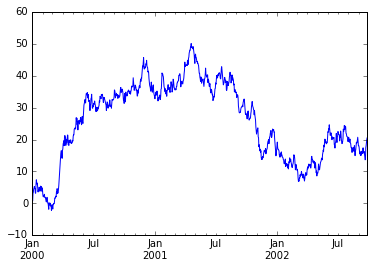

In [7]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

ts = ts.cumsum()

ts.plot()

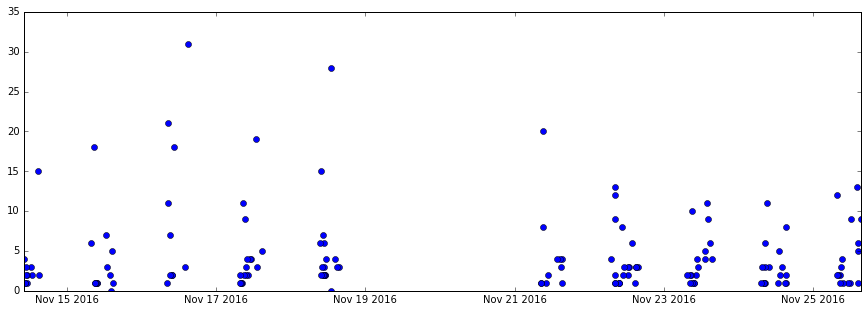

In [26]:
x = df.submit_date_ut.map(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S.%f'))

y = df.time_used_to_complete_action

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot_date(x,y)

plt.show()
